# QDM magnetic microscopy dataset of a speleothem from Morocco - MAT-file

This dataset features a high-resolution magnetic map of a stalagmite sample from Wintimdouine Cave, Morocco, created using Quantum Diamond Microscope (QDM) measurements at Harvard University. It examines the magnetic remanence of hematite and magnetite to provide insights into past geomagnetic field variations recorded in cave deposits.

**Source:** [10.6084/m9.figshare.22965200.v1](https://doi.org/10.6084/m9.figshare.22965200.v1) 

**License:** [CC0](https://creativecommons.org/publicdomain/zero/1.0/)


In [49]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import verde as vd
import pooch
from magali import read_qdm_harvard
import xarray as xr

## Download the data

Use [Pooch](https://github.com/fatiando/pooch) to download the original data file to our computer.

In [50]:
fname = pooch.retrieve(
    url="doi:10.6084/m9.figshare.22965200.v1/Bz_uc0.mat",
    known_hash="md5:268bd3af5e350188d239ff8bd0a88227"
)
print(f"size: {os.path.getsize(fname) / 1e6} Mb")

size: 10.238959 Mb


## Read the data

Use pandas to read the data.

In [51]:
data = read_qdm_harvard(fname)
data

<xarray.Dataset> Size: 9MB
Dimensions:  (y: 600, x: 960)
Coordinates:
  * x        (x) float64 8kB 0.0 2.35 4.7 7.05 ... 2.249e+03 2.251e+03 2.254e+03
  * y        (y) float64 5kB 0.0 2.35 4.7 7.05 ... 1.403e+03 1.405e+03 1.408e+03
    z        (y, x) float64 5MB 5.0 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
Data variables:
    bz       (y, x) float64 5MB 352.4 94.89 41.62 288.4 ... -4.196 -53.56 2.103
Attributes:
    file_name:  /home/yago/.cache/pooch/37cafac63fd8b1e21e8fed50e4e1c87e-Bz_u...

## Plot the data 

Make a quick plot to make sure the data look OK. This plot will be used as a preview of the dataset.

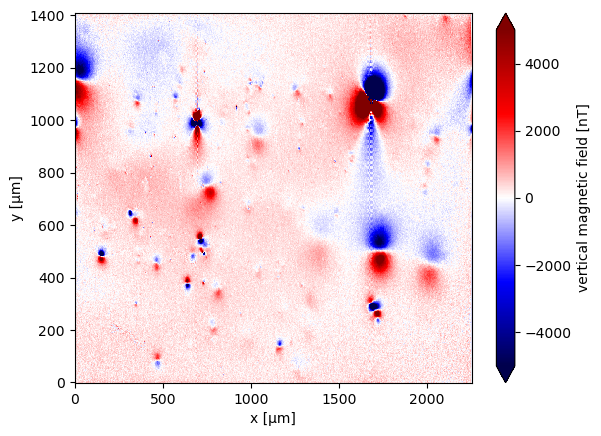

In [52]:
data.bz.plot.pcolormesh(cmap="seismic", vmax=5000, vmin=-5000)
plt.savefig("preview.jpg")

## Export

Make a separate DataFrame to export to netCDF.

Save the data to a file and calculate the size and MD5/SHA256 hashes.

In [66]:
output = "morroco-qdm-bz.nc"
data.to_netcdf(
    output, 
    encoding={
        "bz": { 
            'dtype': 'float32', 
            'scale_factor': 0.01, 
            '_FillValue': 6500,
            'add_offset': np.round(data.bz.values.min(), decimals=1),
        }
    }
)
print(f"file: {output}")
print(f"size: {os.path.getsize(output) / 1e6} Mb")
for alg in ["md5", "sha256"]:
    print(f"{alg}:{pooch.file_hash(output, alg=alg)}")

file: morroco-qdm-bz.nc
size: 6.925204 Mb
md5:115a15a3aa78542b17ad321a7f0c8edb
sha256:c9dd6a43d12d2b75f271e831265e36290e6cd22fbcd747233ef756bef0b69888


## Read back the data and plot it

Verify that the output didn't corrupt anything.

In [67]:
data_reloaded = xr.load_dataarray(output)
data_reloaded

<xarray.DataArray 'bz' (y: 600, x: 960)> Size: 5MB
array([[ 352.4 ,   94.9 ,   41.62, ...,  470.18,  129.2 ,   18.5 ],
       [ 525.04,  624.84,   53.46, ...,  450.42,  240.12,  -73.62],
       [ 105.1 ,  638.76,  307.6 , ...,  236.92,  386.84,  -86.44],
       ...,
       [ -83.74,   32.98, -411.76, ...,  746.  , 1036.2 , -140.64],
       [ 171.18, -214.48,  159.24, ...,  124.58,  258.54,  -90.34],
       [  80.6 ,  273.08,  118.24, ...,   -4.2 ,  -53.56,    2.1 ]])
Coordinates:
  * x        (x) float64 8kB 0.0 2.35 4.7 7.05 ... 2.249e+03 2.251e+03 2.254e+03
    z        (y, x) float64 5MB 5.0 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
  * y        (y) float64 5kB 0.0 2.35 4.7 7.05 ... 1.403e+03 1.405e+03 1.408e+03
Attributes:
    long_name:  vertical magnetic field
    units:      nT

Make the figure again but don't save it to a file this time.

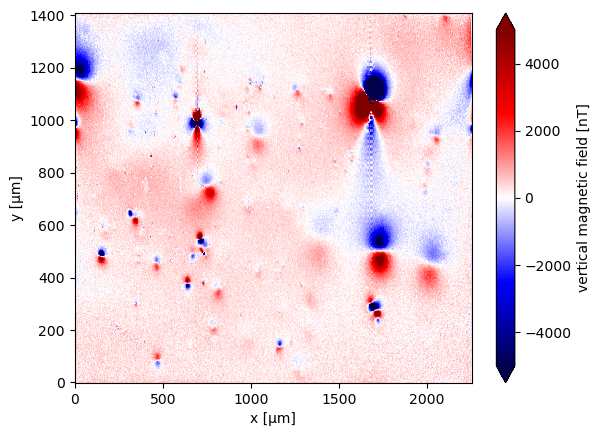

In [68]:
data_reloaded.plot.pcolormesh(cmap="seismic", vmax=5000, vmin=-5000)

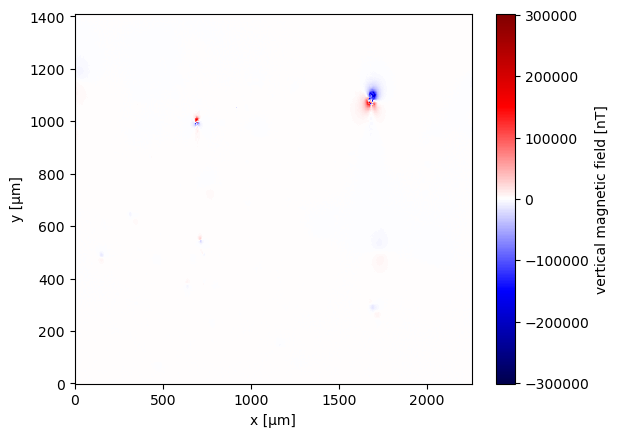

In [69]:
data_reloaded.plot.pcolormesh(cmap="seismic")